# **Laboratorio 3** 
## Modelos de Classificación Lineal
### Modelos Discriminantes

In [2]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [3]:
#%% definición de funciones y sistemas a usar
def sistema1(means = None,Sigmas = None,N = None):
  """
    means: Lista de vectores 1-dimensionales (D,), o lista de listas de elementos, con las medias de cada clase.
    Sigma: Lista de matrices de covarianzas DxD, para cada una de las clases.
    N: lista de numeros de muestras por clase [N1,N2,...,Nk]
  """
  if (means is None) or (Sigmas is None):
    D = 2
  else:
    D = len(means)
  if means is None:
    means = [np.array([1,1]),np.array([3,3])]
  if Sigmas is None:
    Sigma1 = 0.2*np.eye(2)
    #np.array([[2,1],
             #         [1,2]])
    Sigma2 = 0.1*np.eye(2)#np.array([[1,0],[0,1]])
    Sigmas = [Sigma1,Sigma2]
  if N is None:
    N= [100,100]
  X = random.multivariate_normal(means[0],Sigmas[0],N[0])
  t = np.zeros((X.shape[0],1))
  for i in range(1,D):
    X = np.concatenate((X,random.multivariate_normal(means[i],Sigmas[i],N[i])),axis = 0)
    t = np.concatenate((t,i*np.ones((N[i],1))),axis = 0)
  return X,t

# funciones 
def croval_bal(t,p=0.7):
  """
    t: vector de etiquetas 
    p: proporcion de datos para entrenamiento
  """
  if not(p>0 and p<=1):
    print('p debe estar entre 0 y 1')
    return None
  labels = np.unique(t)
  nC = labels.size
  index = [np.where(t==labels[i])[0] for i in range(nC)]
  N = [index[i].size for i in range(nC)]
  for i in range(nC):
    ind = random.permutation(N[i])
    ind = index[i][ind[:int(p*N[i])]].reshape(-1,1)
    if i == 0:
      indices = ind
    else:
      indices = np.concatenate((indices,ind),axis=0)
  mask = False*np.ones((t.size,),dtype=bool)
  mask[indices] = True
  return mask

def target_2_1K(t):
  """
  Pasar de las etiquetas a la notacion 1-K
  """
  labels = np.unique(t) # Clases
  N = t.size
  K = labels.size # Número de Clases
  T = np.zeros((N,K))
  for i in range(N):
    for j in range(K):
      if t[i,0]==labels[j]:
        T[i,j] = 1
  return T
def unoK_2_target(T,labels):
  ind_max = np.argmax(T,axis = 1)
  t = np.zeros((T.shape[0],1))
  for i in range(t.size):
    t[i,0] = labels[ind_max[i]]
  return t


**En la siguiente celda se genera el sistema1 por default. Luego, se separa los datos de entrenamiento y de test. Por último, se grafica tanto datos de Train como de Test.**

X train: (140, 2) t train: (140, 1)
X test: (60, 2) t test: (60, 1)


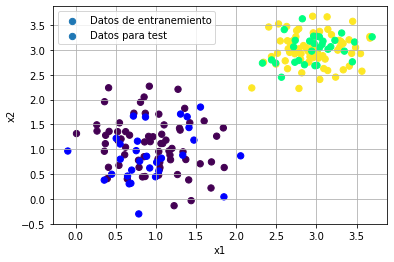

In [4]:
X,t = sistema1()
t[t==0] = -1
#%% Separando conjunto de entrenamiento y de Test
ind = croval_bal(t)

Xtrain = X[ind,:]
tTrain = t[ind,:]
Xtest = X[~ind,:]
tTest = t[~ind,:]
print('X train:',Xtrain.shape,'t train:',tTrain.shape)
print('X test:',Xtest.shape,'t test:',tTest.shape)
#%% Se grafica los datod de entrenamiento y los de test

plt.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento')
plt.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='o',cmap=plt.cm.winter,label='Datos para test')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

**A.** Con los datos de la matriz de datos de entrada $\{\boldsymbol{X}_{Train}\in R^{N\times2},\boldsymbol{t}_{Train}\in R^{N\times1}\}$, estime con estos datos de entrada el modelo discriminativo por Minimos cuadrados, y guarde la matriz resultante en la variable W_mse. Calcule la medida de acierto (*accuracy*) sobre las muestras de Test $\{\boldsymbol{X}_{Test}\in R^{N\times2},\boldsymbol{t}_{Test}\in R^{N\times1}\}$ . ¿Qué pueden observar del resultado? ¿Separa bien las clases? ¿Es el acierto es coherente con los resultados gráficos?

accuracy: 1.0
Axes(1,1;1x1)


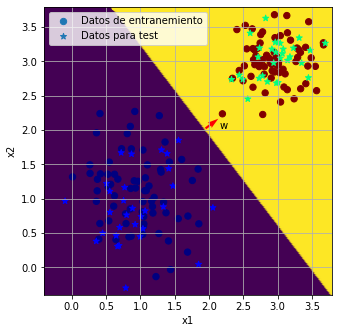

In [14]:
# codificando 1 de K
N,D = Xtrain.shape 
labels = np.unique(tTrain)
# Expand Xtrain -> X tilde
Xtilde = np.concatenate((np.ones((N,1)),Xtrain),axis=1)
#%% Your code

# Pseudoinversa - (Similar al Phi en regresión)
W_mse=np.linalg.pinv(Xtilde)@tTrain


Xtest_new=np.concatenate((np.ones((Xtest.shape[0],1)),Xtest),axis=1)

t_new=np.sign(Xtest_new@W_mse)

# print(t_new==tTest)

# print(tTest)

accuracy=np.mean(t_new==tTest)

print("accuracy: {}".format(accuracy))

# Accuracy t_new con tTest



#%% Para graficar
min_x1 = np.min(X) - 0.1
#min_x2 = np.min(X[:,1]) - 0.1
max_x1 = np.max(X) + 0.1
#max_x2 = np.max(X[:,1]) + 0.1
x1 = np.arange(min_x1,max_x1,0.01)
x2 = np.arange(min_x1,max_x1,0.01)
xx1,xx2 = np.meshgrid(x1,x2)
X_plot = np.concatenate((xx1.reshape(xx1.size,1),xx2.reshape(xx2.size,1)),axis=1)
X_plot_tilde = np.concatenate((np.ones((xx1.size,1)),X_plot),axis=1)
t_plot = X_plot_tilde@W_mse
t_plot[t_plot>0] = labels[1]
t_plot[t_plot<=0] = labels[0]
#t_plot = unoK_2_target(T_plot,labels)7
fig = plt.figure()
axes = fig.add_axes([1, 1, 1, 1])
print(axes)
axes.scatter(X_plot[:,0],X_plot[:,1],c = t_plot,s = 40)
axes.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento',cmap=plt.cm.jet)
axes.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
means = np.mean(X,axis=0)
axes.quiver(means[0],means[1],W_mse[1],W_mse[2],color = 'red')
axes.text(means[0]+0.2,means[1],'w')
plt.xlim([min_x1,max_x1])
plt.ylim([min_x1,max_x1])
axes.set_aspect('equal', 'box')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Respuesta
¿Qué pueden observar del resultado?
En el 

¿Separa bien las clases? ¿Es el acierto es coherente con los resultados gráficos?




**A continuación se genera un nuevo sistema usando la función sistema1**

In [ ]:
means = [[1,1],[1,-2],[3,3]]
Sigma0 = 0.2*np.eye(2)
Sigma1 = 0.2*np.eye(2)
Sigma2 = 0.1*np.eye(2)#np.array([[1,0],[0,1]])
Sigmas = [Sigma0,Sigma1,Sigma2]
X,t = sistema1(means,Sigmas,[100,100,100])
t[t==0] = -1
t[t==1] = -1
t[t==2] == 1
#%% Separando conjunto de entrenamiento y de Test
ind = croval_bal(t)

Xtrain = X[ind,:]
tTrain = t[ind,:]
Xtest = X[~ind,:]
tTest = t[~ind,:]
#%% Se grafica los datos de entrenamiento y los de test
fig = plt.figure()
axes = fig.add_axes([1, 1, 1, 1])
axes.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento')
axes.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
axes.legend()
axes.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

**B.** Con los la matriz de datos de entrada $\{\boldsymbol{X}_{Train}\in R^{N\times2},\boldsymbol{t}_{Train}\in R^{N\times1}\}$, estime con estos datos de entrada el modelo discriminativo por Minimos cuadrados, y guarde la matriz resultante en la variable W_mse y calculen la medida de acierto, accuracy, sobre las muestras de Test $\{\boldsymbol{X}_{Test}\in R^{N\times2},\boldsymbol{t}_{Test}\in R^{N\times1}\}$ . ¿Qué pueden observar del resultado? ¿Separa bien las clases? ¿Es el resultado de accuracy coherente con los resultados gráficos?

In [ ]:
# codificando 1 de K
N,D = Xtrain.shape 
labels = np.unique(tTrain)
# Expand Xtrain -> X tilde
Xtilde = np.concatenate((np.ones((N,1)),Xtrain),axis=1)
#%% Your code






#%% Para graficar
min_x1 = np.min(X) - 0.1
max_x1 = np.max(X) + 0.1
x1 = np.arange(min_x1,max_x1,0.01)
x2 = np.arange(min_x1,max_x1,0.01)
xx1,xx2 = np.meshgrid(x1,x2)
X_plot = np.concatenate((xx1.reshape(xx1.size,1),xx2.reshape(xx2.size,1)),axis=1)
X_plot_tilde = np.concatenate((np.ones((xx1.size,1)),X_plot),axis=1)
t_plot = X_plot_tilde@W_mse
t_plot[t_plot>0] = labels[1]
t_plot[t_plot<=0] = labels[0]
#t_plot = unoK_2_target(T_plot,labels)7
fig = plt.figure()
axes = fig.add_axes([1, 1, 1, 1])
axes.scatter(X_plot[:,0],X_plot[:,1],c = t_plot,s = 40)
axes.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento',cmap=plt.cm.jet)
axes.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
means = np.mean(X,axis=0)
axes.quiver(means[0],means[1]-0.2,W_mse[1],W_mse[2],color = 'red')
axes.text(means[0]+0.2,means[1]-0.2,'w')
plt.xlim([min_x1,max_x1])
plt.ylim([min_x1,max_x1])
axes.set_aspect('equal', 'box')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

**A continuación se genera un nuevo sistema a partir del sistema1**

In [ ]:
means = [[1,1],[1.5,1.5],[0.5,1.5]]
Sigma1 = 0.02*np.eye(2)
Sigma2 = 0.02*np.eye(2)#np.array([[1,0],[0,1]])
Sigma3 = 0.02*np.eye(2)
Sigmas = [Sigma1,Sigma2,Sigma3]

X,t = sistema1(means,Sigmas,[100,100,100])
#%% Separando conjunto de entrenamiento y de Test
ind = croval_bal(t)

Xtrain = X[ind,:]
tTrain = t[ind,:]
Xtest = X[~ind,:]
tTest = t[~ind,:]
#%% Se grafica los datos de entrenamiento y los de test

plt.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento')
plt.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

**C.** Con los la matriz de datos de entrada $\{\boldsymbol{X}_{Train}\in R^{N\times2},\boldsymbol{t}_{Train}\in R^{N\times1}\}$, estime con estos datos de entrada el modelo discriminativo por Minimos cuadrados para clasificación multiclase usando la codificación **1 de K**, y guarde la matriz resultante en la variable W_mse y calculen la medida de acierto, accuracy, sobre las muestras de Test $\{\boldsymbol{X}_{Test}\in R^{N\times2},\boldsymbol{t}_{Test}\in R^{N\times1}\}$ . ¿Qué pueden observar del resultado? ¿Separa bien las clases? ¿Es el resultado de accuracy coherente con los resultados gráficos?

In [ ]:
# codificando 1 de K
N,D = Xtrain.shape 
labels = np.unique(tTrain)
T = target_2_1K(tTrain)
# Expand Xtrain -> X tilde
Xtilde = np.concatenate((np.ones((N,1)),Xtrain),axis=1)
#%% Your code




#%% Para graficar
min_x1 = np.min(X) - 0.1
max_x1 = np.max(X) + 0.1
x1 = np.arange(min_x1,max_x1,0.01)
x2 = np.arange(min_x1,max_x1,0.01)
xx1,xx2 = np.meshgrid(x1,x2)
X_plot = np.concatenate((xx1.reshape(xx1.size,1),xx2.reshape(xx2.size,1)),axis=1)
X_plot_tilde = np.concatenate((np.ones((xx1.size,1)),X_plot),axis=1)
T_plot = X_plot_tilde@W_mse
t_plot = unoK_2_target(T_plot,labels)
fig = plt.figure()
axes = fig.add_axes([1, 1, 1, 1])
axes.scatter(X_plot[:,0],X_plot[:,1],c = t_plot,s = 40)
axes.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento',cmap=plt.cm.jet)
axes.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
plt.xlim([min_x1,max_x1])
plt.ylim([min_x1,max_x1])
axes.set_aspect('equal', 'box')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

**Volvemos al primer sistema**

In [ ]:
X,t = sistema1()
t[t==0] = -1
#%% Separando conjunto de entrenamiento y de Test
ind = croval_bal(t)

Xtrain = X[ind,:]
tTrain = t[ind,:]
Xtest = X[~ind,:]
tTest = t[~ind,:]
#%% Se grafica los datod de entrenamiento y los de test

plt.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento')
plt.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

**D.** Con los datos de entrada $\{\boldsymbol{X}_{Train}\in R^{N\times2},\boldsymbol{t}_{Train}\in R^{N\times1}\}$, estime con estos datos de entrada el modelo discriminativo por Análisis Discriminante de Fisher, use las librerias **Scikit-Learn**, y calculen la medida de acierto, accuracy, sobre las muestras de Test $\{\boldsymbol{X}_{Test}\in R^{N\times2},\boldsymbol{t}_{Test}\in R^{N\times1}\}$; adicional exporte los coeficientes wi en la variable W_lda. ¿Qué pueden observar del resultado? ¿Separa bien las clases? ¿Es el resultado de accuracy coherente con los resultados gráficos?

In [ ]:
#%% Your code







#%% Para graficar
min_x1 = np.min(X) - 0.1
max_x1 = np.max(X) + 0.1
x1 = np.arange(min_x1,max_x1,0.01)
x2 = np.arange(min_x1,max_x1,0.01)
xx1,xx2 = np.meshgrid(x1,x2)
X_plot = np.concatenate((xx1.reshape(xx1.size,1),xx2.reshape(xx2.size,1)),axis=1)
t_plot = clf.predict(X_plot).reshape(-1,1)
fig = plt.figure()
axes = fig.add_axes([1, 1, 1, 1])
axes.scatter(X_plot[:,0],X_plot[:,1],c = t_plot,s = 40)
axes.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento',cmap=plt.cm.jet)
axes.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
means = np.mean(X,axis=0)
axes.quiver(means[0],means[1],W_lda[0,0],W_lda[0,1],color = 'red')
axes.text(means[0]+0.2,means[1],'w')
plt.xlim([min_x1,max_x1])
plt.ylim([min_x1,max_x1])
axes.set_aspect('equal', 'box')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

**A continuación se genera un nuevo sistema usando la función sistema1**

In [ ]:
means = [[1,1],[1,-2],[3,3]]
Sigma0 = 0.2*np.eye(2)
Sigma1 = 0.2*np.eye(2)
Sigma2 = 0.1*np.eye(2)#np.array([[1,0],[0,1]])
Sigmas = [Sigma0,Sigma1,Sigma2]
X,t = sistema1(means,Sigmas,[100,100,100])
t[t==0] = -1
t[t==1] = -1
t[t==2] == 1
#%% Separando conjunto de entrenamiento y de Test
ind = croval_bal(t)

Xtrain = X[ind,:]
tTrain = t[ind,:]
Xtest = X[~ind,:]
tTest = t[~ind,:]
#%% Se grafica los datod de entrenamiento y los de test

plt.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento')
plt.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')

**E.** Con los la matriz de datos de entrada $\{\boldsymbol{X}_{Train}\in R^{N\times2},\boldsymbol{t}_{Train}\in R^{N\times1}\}$, estime con estos datos de entrada el modelo discriminativo por Minimos cuadrados, y guarde la matriz resultante en la variable W_mse y calculen la medida de acierto, accuracy, sobre las muestras de Test $\{\boldsymbol{X}_{Test}\in R^{N\times2},\boldsymbol{t}_{Test}\in R^{N\times1}\}$ . ¿Qué pueden observar del resultado? ¿Separa bien las clases? ¿Es el resultado de accuracy coherente con los resultados gráficos?

In [ ]:
#%% Your code









#%% Para graficar
min_x1 = np.min(X) - 0.1
#min_x2 = np.min(X[:,1]) - 0.1
max_x1 = np.max(X) + 0.1
#max_x2 = np.max(X[:,1]) + 0.1
x1 = np.arange(min_x1,max_x1,0.01)
x2 = np.arange(min_x1,max_x1,0.01)
xx1,xx2 = np.meshgrid(x1,x2)
X_plot = np.concatenate((xx1.reshape(xx1.size,1),xx2.reshape(xx2.size,1)),axis=1)
t_plot = clf.predict(X_plot).reshape(-1,1)
fig = plt.figure()
axes = fig.add_axes([1, 1, 1, 1])
axes.scatter(X_plot[:,0],X_plot[:,1],c = t_plot,s = 40)
axes.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento',cmap=plt.cm.jet)
axes.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
means = np.mean(X,axis=0)
axes.quiver(means[0]+0.4,means[1]+0.2,W_lda[0,0],W_lda[0,1],color = 'red')
axes.text(means[0]+0.6,means[1],'w')
plt.xlim([min_x1,max_x1])
plt.ylim([min_x1,max_x1])
axes.set_aspect('equal', 'box')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')

**Acontinuación se genera un nuevo sistema a partir del sistema1**

In [ ]:
means = [[1,1],[1.5,1.5],[0.5,1.5]]
Sigma1 = 0.02*np.eye(2)
Sigma2 = 0.02*np.eye(2)#np.array([[1,0],[0,1]])
Sigma3 = 0.02*np.eye(2)
Sigmas = [Sigma1,Sigma2,Sigma3]

X,t = sistema1(means,Sigmas,[100,100,100])
#%% Separando conjunto de entrenamiento y de Test
ind = croval_bal(t)

Xtrain = X[ind,:]
tTrain = t[ind,:]
Xtest = X[~ind,:]
tTest = t[~ind,:]
#%% Se grafica los datod de entrenamiento y los de test

plt.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento')
plt.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')

**F.** Con los datos de entrada $\{\boldsymbol{X}_{Train}\in R^{N\times2},\boldsymbol{t}_{Train}\in R^{N\times1}\}$, estime con estos datos de entrada el modelo discriminativo por Análisis Discriminante de Fisher, use las librerias **Scikit-Learn**, y calculen la medida de acierto, accuracy, sobre las muestras de Test $\{\boldsymbol{X}_{Test}\in R^{N\times2},\boldsymbol{t}_{Test}\in R^{N\times1}\}$ . ¿Qué pueden observar del resultado? ¿Separa bien las clases? ¿Es el resultado de accuracy coherente con los resultados gráficos?

In [ ]:
#%% Your code







#%% Para graficar
min_x1 = np.min(X) - 0.1
#min_x2 = np.min(X[:,1]) - 0.1
max_x1 = np.max(X) + 0.1
#max_x2 = np.max(X[:,1]) + 0.1
x1 = np.arange(min_x1,max_x1,0.01)
x2 = np.arange(min_x1,max_x1,0.01)
xx1,xx2 = np.meshgrid(x1,x2)
X_plot = np.concatenate((xx1.reshape(xx1.size,1),xx2.reshape(xx2.size,1)),axis=1)
t_plot = clf.predict(X_plot).reshape(-1,1)
fig = plt.figure()
axes = fig.add_axes([1, 1, 1, 1])
axes.scatter(X_plot[:,0],X_plot[:,1],c = t_plot,s = 40)
axes.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento',cmap=plt.cm.jet)
axes.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
#means = np.mean(X,axis=0)
#axes.quiver(means[0],means[1],W_mse[1],W_mse[2],color = 'red')
#axes.text(means[0]+0.2,means[1],'w')
plt.xlim([min_x1,max_x1])
plt.ylim([min_x1,max_x1])
axes.set_aspect('equal', 'box')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')

**A continuación se genera una base de datos por medio de la función sistema1**

In [ ]:
means = [[1,1],[1,-2],[3,3]]
Sigma0 = 0.2*np.eye(2)
Sigma1 = 0.2*np.eye(2)
Sigma2 = 0.1*np.eye(2)#np.array([[1,0],[0,1]])
Sigmas = [Sigma0,Sigma1,Sigma2]
X,t = sistema1(means,Sigmas,[100,100,100])
t=np.sign(t-1.5)
#%% Separando conjunto de entrenamiento y de Test
ind = croval_bal(t)

Xtrain = X[ind,:]
tTrain = t[ind,:]
Xtest = X[~ind,:]
tTest = t[~ind,:]
#%% Se grafica los datod de entrenamiento y los de test

plt.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento')
plt.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

**G.** Con los datos de entrada {XTrain∈RN×2,tTrain∈RN×1}, implemente y entrene una máquina de aprendizaje de perceptron. Calcule el accuracy de la clasificación sobre los datos de test $\{\boldsymbol{X}_{Test}\in R^{N\times2},\boldsymbol{t}_{Test}\in R^{N\times1}\}$, y guarde los valores de los parámetros del modelo, $w_i$, en la variable W_perc. Para esto use que $\phi(\boldsymbol{x}) = \boldsymbol{x}$. ¿Existe una diferencia con Mínimos Cuadrados o con Análisis dircrminativo de Fisher (LDA)? ¿Qué diferencias?



In [ ]:
W_perc = np.array([1,0,0]).reshape(-1,1) # inicialización de los pesos
print(W_perc.shape)
eta = 1 # Tasa de aprendizaje
Phi = np.concatenate((np.ones((Xtrain.shape[0],1)),Xtrain),axis = 1)
print(Phi.shape)
error = False
max_iter = 1000
tol_error = 1e-5 
error = 1
#%% Your code

W_perc_new = W_perc + eta*Phi*tTrain
M = np.where(t_est*tTest<0)[0]





#%% Pata Graficar
Xtilde_test = np.concatenate((np.ones((Xtest.shape[0],1)),Xtest),axis=1)
#T_est = Xtilde_test@W_mse
#t_est = unoK_2_target(T_est,labels)
t_est = np.sign(Xtilde_test@W_perc)
acc = np.mean(tTest==t_est)
print('Accuracy =',acc)
#%% Para graficar
min_x1 = np.min(X) - 0.1
#min_x2 = np.min(X[:,1]) - 0.1
max_x1 = np.max(X) + 0.1
#max_x2 = np.max(X[:,1]) + 0.1
x1 = np.arange(min_x1,max_x1,0.01)
x2 = np.arange(min_x1,max_x1,0.01)
xx1,xx2 = np.meshgrid(x1,x2)
X_plot = np.concatenate((xx1.reshape(xx1.size,1),xx2.reshape(xx2.size,1)),axis=1)
X_plot_tilde = np.concatenate((np.ones((xx1.size,1)),X_plot),axis=1)
t_plot = np.sign(X_plot_tilde@W_perc)
#t_plot = unoK_2_target(T_plot,labels)7
fig = plt.figure()
axes = fig.add_axes([1, 1, 1, 1])
axes.scatter(X_plot[:,0],X_plot[:,1],c = t_plot,s = 40)
axes.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento',cmap=plt.cm.jet)
axes.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
means = np.mean(X,axis=0)
axes.quiver(1,2.6,W_perc[1],W_perc[2],color = 'red')
axes.text(1.1,2.8,'w')
plt.xlim([min_x1,max_x1])
plt.ylim([min_x1,max_x1])
axes.set_aspect('equal', 'box')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
    

**H** Ahora implemente los tres modelos de classificación vistos anteriormente: Mínimos Cuadrados, LDA y Perceptron; sobre una base de datos real. Realice este ejercicio sobre una metodología de validación cruzada de k-fold (sklearn.model_selection documentación). De este proceso se deben de mostrar los diferentes resultados de las classificaciones, como lo es las medidas de rendimiento. Para lo anterior, usen https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html para el clasificador lineal por **Mínimos Cuadrados** y para el **Perceptron** usen https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html